# Bernstein Vazirani algorithm

In [1]:
from qlasskit import qlassf, Qint, Qint2

@qlassf
def oracle(a: Qint[4]) -> bool:
    return (a[0] & True) | (a[1] & False) | (a[2] & False) | (a[3] & True)

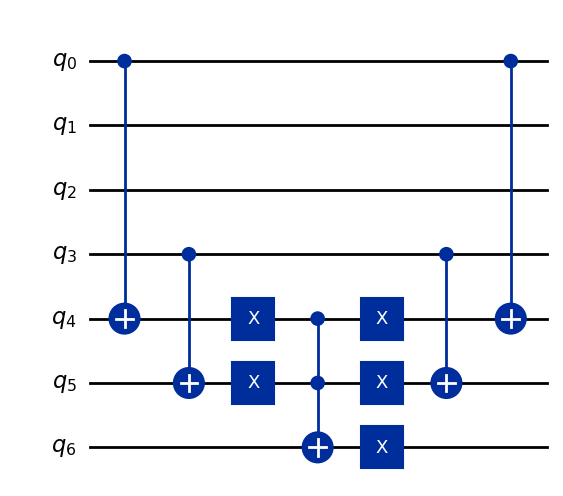

In [2]:
oracle.export("qiskit").draw("mpl")

In [3]:
from qlasskit.algorithms import BernsteinVazirani

q_algo = BernsteinVazirani(oracle)

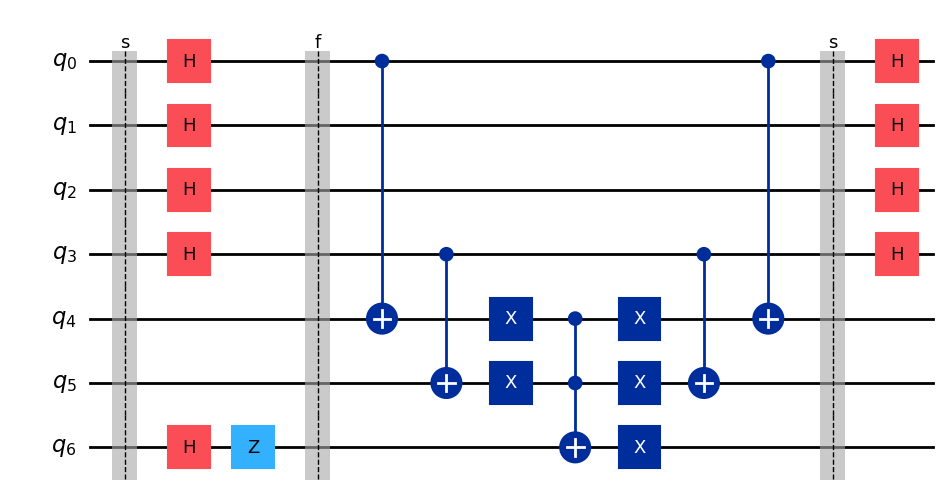

In [4]:
qc = q_algo.export("qiskit")
qc.draw("mpl")

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc.measure_all()
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

#counts_readable = q_algo.decode_output(counts)
print(counts)
#plot_histogram(counts)

{'1001000': 126, '1001001': 134, '0000000': 125, '1000000': 118, '1000001': 124, '0001001': 119, '0001000': 150, '0000001': 128}
